# 강서구와 서울 65세 이상 인구 시각화

In [1]:
import pandas as pd 

In [2]:
df = pd.read_excel('./서울 고령 인구수.xls')

In [3]:
df

,기간,행정구역별,고령인구,남자,여자
0,2022,합계,1620545,717033,903512
1,2022,종로구,27019,11902,15117
2,2022,중구,23474,10112,13362
3,2022,용산구,37357,16076,21281
4,2022,성동구,48880,21269,27611
5,2022,광진구,53587,24012,29575
6,2022,동대문구,62904,27947,34957
7,2022,중랑구,71803,32191,39612
8,2022,성북구,73764,31604,42160
9,2022,강북구,64386,27638,36748


In [4]:
# 결측치 확인
df.isnull().sum()

기간       0
행정구역별    0
고령인구     0
남자       0
여자       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      26 non-null     int64 
 1   행정구역별   26 non-null     object
 2   고령인구    26 non-null     int64 
 3   남자      26 non-null     int64 
 4   여자      26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [6]:
df.describe()

,기간,고령인구,남자,여자
count,26.0,2.600000e+01,26.000000,26.000000
mean,2022.0,1.246573e+05,55156.384615,69500.923077
std,0.0,3.056870e+05,135268.011451,170423.047432
min,2022.0,2.347400e+04,10112.000000,13362.000000
25%,2022.0,5.375125e+04,23247.000000,30916.000000
50%,2022.0,6.730350e+04,29734.000000,37155.500000
75%,2022.0,7.823250e+04,35578.500000,42877.750000
max,2022.0,1.620545e+06,717033.000000,903512.000000


In [7]:
df.columns[0]

'기간'

In [8]:
df1 = pd.read_excel('./서울 고령 인구수.xls', index_col = '행정구역별', usecols = "B:C")

In [9]:
df1

,고령인구
행정구역별,
합계,1620545
종로구,27019
중구,23474
용산구,37357
성동구,48880
광진구,53587
동대문구,62904
중랑구,71803
성북구,73764


In [10]:
df2 = df1.drop("합계", axis = "index")

In [11]:
df2

,고령인구
행정구역별,
종로구,27019
중구,23474
용산구,37357
성동구,48880
광진구,53587
동대문구,62904
중랑구,71803
성북구,73764
강북구,64386


In [12]:
df2['고령인구']

행정구역별
종로구     27019
중구      23474
용산구     37357
성동구     48880
광진구     53587
동대문구    62904
중랑구     71803
성북구     73764
강북구     64386
도봉구     66133
노원구     88934
은평구     86735
서대문구    54244
마포구     53201
양천구     68633
강서구     95427
구로구     79250
금천구     44830
영등포구    65463
동작구     68474
관악구     81880
서초구     60736
강남구     75180
송파구     99566
강동구     68685
Name: 고령인구, dtype: int64

In [13]:
df2['고령인구'].values

array([27019, 23474, 37357, 48880, 53587, 62904, 71803, 73764, 64386,
       66133, 88934, 86735, 54244, 53201, 68633, 95427, 79250, 44830,
       65463, 68474, 81880, 60736, 75180, 99566, 68685], dtype=int64)

In [14]:
# 서울 전체 평균 고령 인구 수 
df2.mean()

고령인구    64821.8
dtype: float64

In [15]:
# 강서구 고령인구 수 

df4 = df2.iloc[15:16]
df4

,고령인구
행정구역별,
강서구,95427


## 인구 데이터 시각화

In [16]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
import seaborn as sns
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 12  # 글씨 크기
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='행정구역별', ylabel='고령인구'>

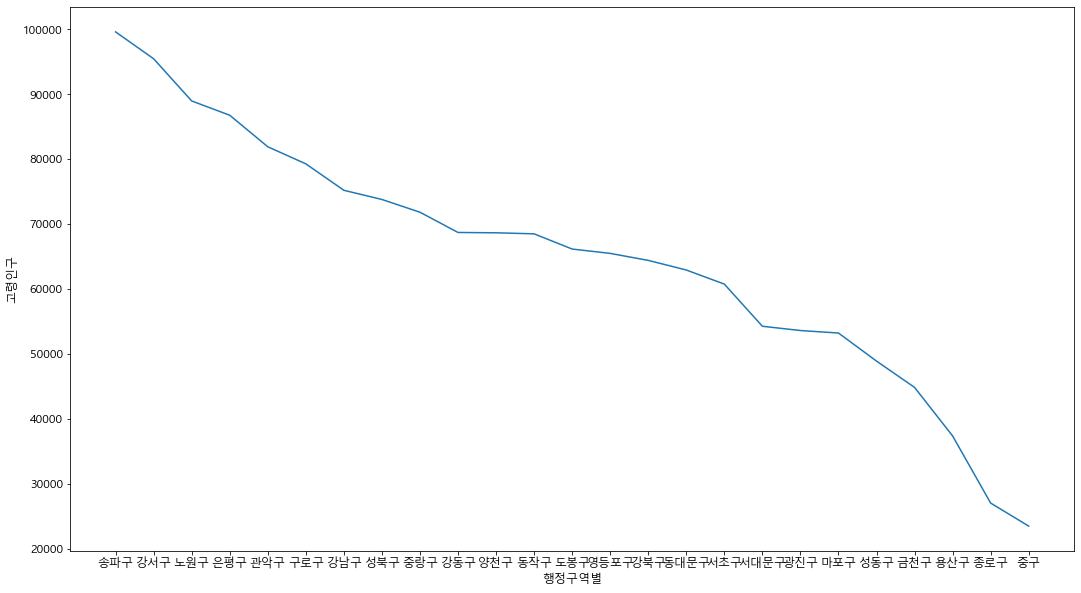

In [17]:
# 행정구역별 고령인구 수
df3 = df2.sort_values('고령인구', ascending=False)
plt.figure(figsize = (18,10))

sns.lineplot(
        x = '행정구역별',
        y = '고령인구',
        data = df3,
)

<AxesSubplot:xlabel='행정구역별', ylabel='고령인구'>

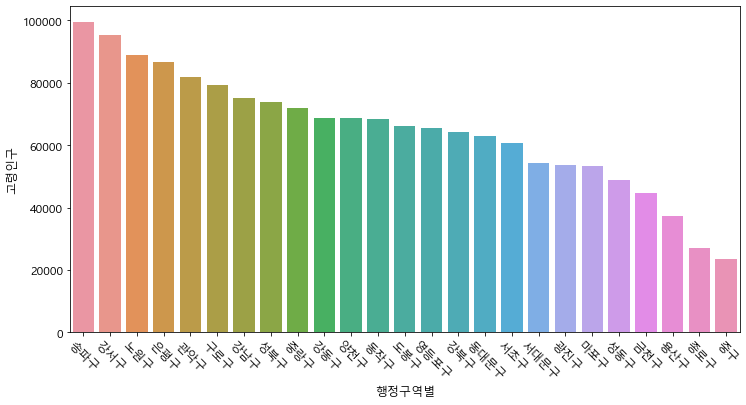

In [18]:
# 행정구역별 고령인구 순위

df3 = df2.sort_values('고령인구', ascending=False)
plt.figure(figsize = (12,6))
plt.xticks(rotation = -45)
sns.barplot(data=df3, x = df3.index, y = df3['고령인구'])

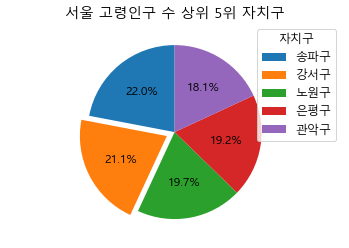

In [19]:
import matplotlib.pyplot as plt 
df5 = df3['고령인구'].head(5)
plt.axis('equal')
plt.title('서울 고령인구 수 상위 5위 자치구')
plt.pie(df5, startangle=90, autopct='%.1f%%', explode=(0,0.1,0,0,0))
plt.legend(labels = df3.index, title = '자치구')
#plt.show()

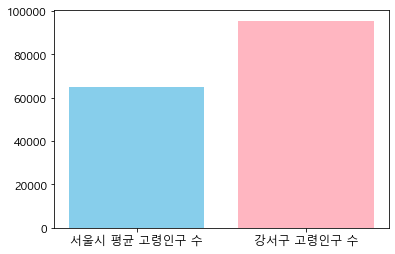

In [20]:
# 강서구와 서울 전체 평균 고령(65세 이상) 인구 비교 시각화 (그래프)

import matplotlib.pyplot as plt 
import numpy as np

x = np.arange(2)
population = ['서울시 평균 고령인구 수', '강서구 고령인구 수']
values = [64821.8, 95427]

# 64821.8 = 서울 전체 평균 고령인구 수
# 95427 = 강서구 고령인구 수

plt.bar(x, values, color = ['skyblue', 'lightpink'])
plt.xticks(x, population)
plt.show()